# Von Mises-Fisher distributions

$
\mathcal{v}(\omega \mid \mu, \kappa)
= \frac{\kappa}{2 \pi (1 - \exp(-2 \pi \kappa))}
\exp \left(
  \kappa \left(
    \mu^\top \omega - 1
  \right)
\right)
$

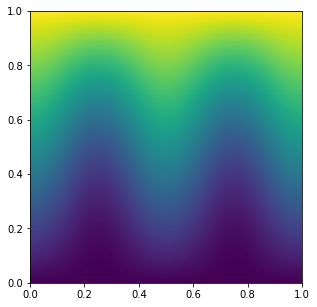

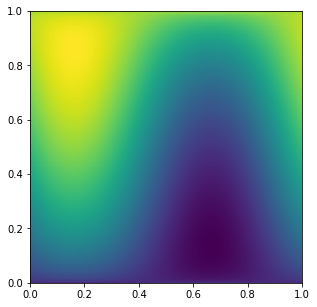

0.3333333333333333 [0.64846324 0.55274415 0.52342079] 0.1
0.3333333333333333 [-0.56059345  0.4323279   0.70627726] 0.1
0.3333333333333333 [0.7670491  0.39668653 0.50425735] 0.1



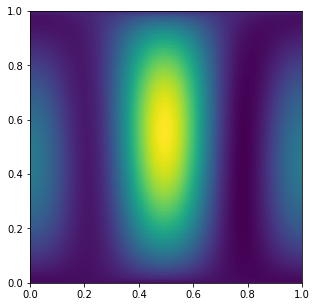

0.18058540176957555 [ 0.99389767  0.00808356 -0.1100094 ] 0.3388291308046626
0.5295000047184475 [-0.99329006  0.01541841  0.11461734] 0.37763325022508537
0.2899145935119769 [ 0.99399551  0.00550814 -0.10928214] 0.410494614543444



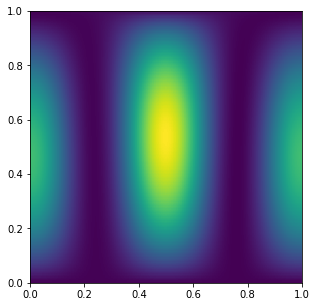

0.1086848017108719 [ 9.97759646e-01  5.91438569e-04 -6.68979803e-02] 1.030746887614036
0.513154702057505 [-0.99729566  0.00828348  0.07302566] 1.1992810610229858
0.3781604962316231 [ 0.99750969 -0.00115374 -0.07052018] 1.2829519645113183



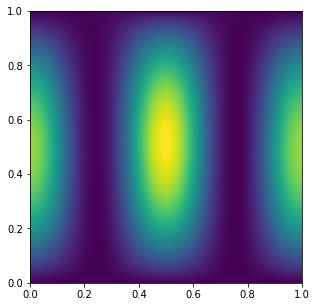

0.070267419915207 [ 9.97667909e-01 -3.99506185e-04  6.82538210e-02] 1.1039219744038662
0.5119849695300752 [-0.99951831  0.00821129  0.02992847] 1.3557947594026558
0.4177476105547178 [ 0.99926294 -0.00159502 -0.03835407] 1.435268004638253



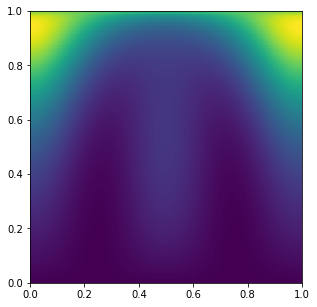

0.07576248235639248 [ 0.43915725 -0.01231113  0.89832586] 2.8307184671882317
0.4977155338818988 [-0.99905333  0.00868188 -0.04262699] 1.4295956240561427
0.42652198376170875 [ 0.98278175  0.00104206 -0.18476728] 1.48074806983138



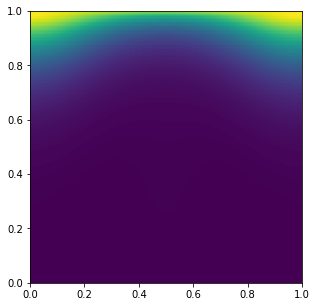

0.2071298738631361 [ 0.19538839 -0.0101369   0.98067355] 4.749964246907062
0.41868240927435224 [-0.98029617  0.00702686 -0.19740833] 2.1665494355642916
0.37418771686251157 [ 0.8631458   0.00633576 -0.50491502] 2.393181715952827



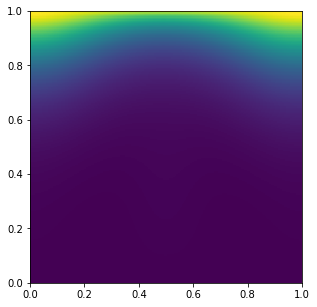

0.26511256745428163 [ 0.16507443 -0.00876213  0.98624219] 3.820152441285336
0.38351484638305716 [-0.95583339  0.00669285 -0.29383285] 2.507126028272409
0.35137258616266126 [ 0.83412157  0.00699372 -0.55153631] 2.675820933784459



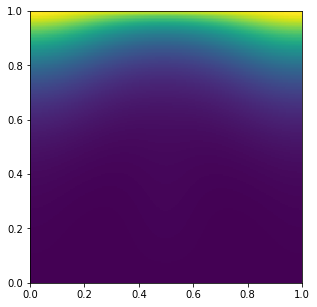

0.29366262134186477 [ 0.13896365 -0.00813844  0.99026404] 3.4392615303143277
0.3658172930366293 [-0.93782376  0.00656433 -0.34704972] 2.6811161351232125
0.340520085621506 [ 0.82514089  0.0071944  -0.56488118] 2.8007854642868963



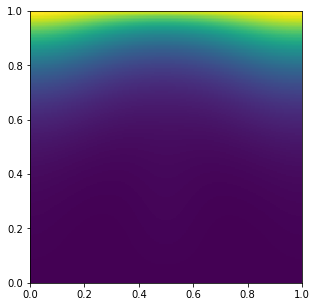

0.3079147915270346 [ 0.1164077  -0.00777684  0.99317107] 3.2648074490684222
0.35673696140142375 [-0.92471965  0.00656142 -0.38059232] 2.7719567239157565
0.33534824707154165 [ 0.82589926  0.00714933 -0.56377239] 2.858883221252709



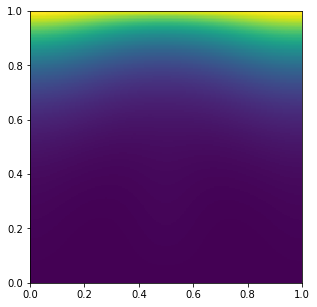

0.3151902628498457 [ 0.09700144 -0.00752985  0.99525576] 3.1795135853814913
0.3520324617833192 [-0.91460642  0.00662339 -0.40429101] 2.8196681590616812
0.33277727536683516 [ 0.83074889  0.00698902 -0.55660348] 2.8874725382165005



In [246]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import numpy as np

def vmf_lines3d(mu, kappa, T=0.01, res=256):
    if np.abs(mu[0]) > np.abs(mu[1]):
        mu_u = np.array([ -mu[2], 0, mu[0] ])
    else:
        mu_u = np.array([ 0, mu[2], -mu[1] ])
    mu_u = mu_u / np.linalg.norm(mu_u)
    mu_v = np.cross(mu, mu_u)
    
    cosTheta = 0#np.log(T/kappa * 2*np.pi * (1 - np.exp(-2*np.pi*kappa)))/kappa + 1
    sinTheta = np.sqrt(1 - cosTheta**2)
    
    print(cosTheta, sinTheta, mu, kappa)
    
    phi = np.linspace(0, 2*np.pi, res)[np.newaxis,:]
    return (
        cosTheta * mu[:,np.newaxis]
        + sinTheta * (
            np.cos(phi) * mu_u[:,np.newaxis]
            + np.sin(phi) * mu_v[:,np.newaxis]
        )
    )

def dir2canonical(xyz):
    cosTheta = xyz[2,:]
    phi = np.arctan2(xyz[1,:], xyz[0,:])
    phi = (phi + 2*np.pi) % (2*np.pi)

    return np.stack([
        (cosTheta + 1) / 2,
        phi / (2*np.pi)
    ])

def plot2d(pdf):
    plt.figure(figsize=(10, 5))
    
    u, v = np.mgrid[0:1:200j, 0:1:400j]
    
    cosTheta = 2*u - 1
    sinTheta = np.sqrt(1 - cosTheta**2)
    phi = 2*np.pi*v
    
    x = sinTheta * np.cos(phi)
    y = sinTheta * np.sin(phi)
    z = 1-cosTheta
    
    omega = np.stack([ x, y, z ])
    p = pdf(omega)
    p /= np.max(p)
    
    plt.imshow(p, extent=(0,1,0,1))

def plot3d(pdf):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.gcf().add_subplot(111, projection='3d')

    u, v = np.mgrid[0:np.pi:100j, 0:2*np.pi:100j]

    x = np.sin(u) * np.cos(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(u)

    omega = np.stack([ x, y, z ])
    p = pdf(omega)
    p /= np.max(p)

    #p = y
    x, y, z = x, 1-z, y
    ax.plot_surface(x, y, z, rstride=1, cstride=1,
                           linewidth=0, antialiased=False, shade=False,
                           facecolors=cm.coolwarm(p))

    plt.show()

class VMF(object):
    def __init__(self, mu, kappa):
        self.mu = mu
        self.kappa = kappa
    
    def pdf(self, omega):
        v = self.kappa / (2*np.pi*(1 - np.exp(-2*np.pi*self.kappa)))
        
        mu_t = self.mu.reshape((1, 3))
        omg = omega.reshape((3, -1))
        
        v *= np.exp(self.kappa * (np.matmul(mu_t, omg) - 1))
        
        out_shape = list(omega.shape)
        out_shape.pop(0)
        
        return v.reshape(out_shape)

class VMM(object):
    def __init__(self, N):
        self.reset(N)
    
    def reset(self, N):
        def rnd_vec():
            v = 2*np.random.random((3)) - 1
            return v / np.linalg.norm(v)
        
        # initialization
        self.vmfs = [
            (1/N, VMF(rnd_vec(), 0.1))
            for i in range(N)
        ]
    
    def pdf(self, omega):
        p = 0
        for (weight, vmf) in self.vmfs:
            p += weight * vmf.pdf(omega)
        return p
    
    def dump(self):
        for (weight, vmf) in self.vmfs:
            print(weight, vmf.mu, vmf.kappa)
        print()
    
    def wEMstep(self, Li, p, omega):
        w = Li / p # (N)
        w /= np.sum(w, axis=0)
        
        gamma = np.stack([ # (k, N)
            weight * vmf.pdf(omega)
            for (weight, vmf) in self.vmfs
        ])
        gamma /= np.sum(gamma, axis=0)
        
        #print("gamma", gamma.shape, np.max(gamma))
        
        r = np.sum( # (k, N, 3) -> (k, 3)
            w[np.newaxis,:,np.newaxis]          # (1, N, 1)
            * gamma[:,:,np.newaxis]             # (k, N, 1)
            * omega.transpose()[np.newaxis,:,:] # (1, N, 3)
        , axis=1)
        
        wtf = np.sum( # (k, N) -> (k)
            w[np.newaxis,:] * gamma,
            axis=1
        )
        
        r_abs = np.linalg.norm(r, axis=1) # (k, 3) -> (k)
        r_bar = r_abs / wtf
        
        #print("r", r.shape, r)
        #print("wtf", wtf.shape, wtf)
        #print("r_abs", r_abs.shape, r_abs)
        #print("r_bar", r_bar.shape, np.max(r_bar))#r_bar)
        
        mu_hat = r / r_abs[:, np.newaxis]
        kappa_hat = (3*r_bar - r_bar**3) / (1 - r_bar**2)
        weight_hat = wtf / np.sum(wtf, axis=0)
        
        #print(mu_hat.shape, np.linalg.norm(mu_hat, axis=0))
        #print(kappa_hat.shape, kappa_hat)
        #print(weight_hat.shape, weight_hat)
        
        for i in range(len(self.vmfs)):
            self.vmfs[i] = (
                weight_hat[i],
                VMF(mu_hat[i,:], kappa_hat[i])
            )
        
class Test:
    def __init__(self):
        pass
    
    def pdf(self, omega):
        return omega[0,:]**2 + omega[2,:]**2

def sample_sphere(Nsamples):
    uv = np.random.random((2, Nsamples))
    z = 1 - 2 * uv[0,:]
    r = np.sqrt(1 - z*z)
    phi = 2*np.pi*uv[1,:]
    
    xyz = np.stack([
        r * np.cos(phi),
        r * np.sin(phi),
        z
    ])
    p = np.ones((Nsamples)) / (4*np.pi)
    return (xyz, p)
    
test = Test()
vmm = VMM(3)

omega, p = sample_sphere(16384)
Li = test.pdf(omega)

#plot2d(vmf.pdf)
#for (weight, vmf) in vmm.vmfs:
#    uv = dir2canonical(vmf_lines3d(vmf.mu, vmf.kappa))
#    plt.plot(uv[1,:], uv[0,:], c='w')
#plt.show()

plot2d(test.pdf)
for i in range(100):
    if i % 10 == 0:
        plot2d(vmm.pdf)
        plt.show()
        vmm.dump()
    vmm.wEMstep(Li, p, omega)